# Sales Forecasting Project
***

_**Importing the required libraries & packages**_

In [3]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')

_**Reading the Dataset using Pandas Command**_

In [4]:
df = pd.read_csv("/content/Train.csv")

## Exploratory Data Analysis (EDA)

_**Getting all the unique value counts from all the columns using <span style = 'background : green'> <span style = 'color : white'>  lambda   </span></span> function**_

In [5]:
count_values_count=df.apply(lambda x : len(x.unique()))
count_values_count

,0
Item_Identifier,1559
Item_Weight,416
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,4
Outlet_Location_Type,3


**Getting all the unique values from all the columns**

In [6]:
df.apply(pd.unique)

,0
Item_Identifier,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO..."
Item_Weight,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n..."
Item_Fat_Content,"[Low Fat, Regular, low fat, LF, reg]"
Item_Visibility,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0..."
Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl..."
Item_MRP,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,..."
Outlet_Identifier,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04..."
Outlet_Establishment_Year,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199..."
Outlet_Size,"[Medium, nan, High, Small]"
Outlet_Location_Type,"[Tier 1, Tier 3, Tier 2]"


_**Checking the dataset whether it's having duplicate values or not**_

In [7]:
df.duplicated().sum()

np.int64(0)

_**Checking for the null values of all the columns from the dataset**_

In [8]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


_**Getting the Data types and Non-null count of all the columns from the dataset using <span style = 'background : green'><span style = 'color : white'> .info() </span> </span> statement**_

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

_**Getting all the columns with "object" data type from the dataset and appending it to the list**_

In [10]:
cat_col=df.select_dtypes(include='object').columns.tolist()
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

_**Removing the columns `Item_Identifier` and `Outlet_Identifier` from the list since the both columns doesn't need any cleaning**_

In [11]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')

_**Displaying the list after removing certain columns from it to verify**_

In [12]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

_**Getting the unique value counts of the columns in the list**_

In [13]:
df[cat_col].nunique()


,0
Item_Fat_Content,5
Item_Type,16
Outlet_Size,3
Outlet_Location_Type,3
Outlet_Type,4


_**Checking the value counts of the columns from the list and displaying it column wise**_

In [14]:
def show_value_counts(col):
    print(col)
    print(df[col].value_counts(), '\n')
    print('-'*55)

df[cat_col].apply(lambda x: show_value_counts(x.name))


Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64 

-------------------------------------------------------
Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64 

-------------------------------------------------------
Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64 

-------------------------------------------------------
Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2  

,0
Item_Fat_Content,None
Item_Type,None
Outlet_Size,None
Outlet_Location_Type,None
Outlet_Type,None


_**Getting the null values from the `Item_Weight` column for the null value treatment process and displaying the Dataset with null values in the `Item_Weight` column**_

In [15]:
miss_bool = df['Item_Weight'].isnull()
Item_Weight_Null = df[miss_bool]
Item_Weight_Null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


_**Identifying the unique value counts in `Item_Identifier` column from the `Item_Weight` null value dataset**_

In [16]:
Item_Weight_Null['Item_Identifier'].value_counts()

,count
Item_Identifier,
FDP11,2
FDA36,2
FDQ13,2
FDG02,2
FDX03,2
...,...
FDM44,1
FDZ48,1
FDK41,1


_**Getting the mean values of the `Item_Weight` with respect to `Item_Identifier` column of the dataset using <span style = 'background : green'><span style = 'color : white'> Pivot Table </span> </span> function**_

In [17]:
Item_Weight_Mean = df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
Item_Weight_Mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


_**Treating the missing values of the `Item_Weight` column with the mean values we got above using <span style = 'background : green'><span style = 'color : white'> Pivot Table </span> </span> function and filling it out with respect to `Item_Identifier` column**_

In [18]:
# Create a mapping from Item_Identifier to its corresponding average Item_Weight
weight_map = Item_Weight_Mean['Item_Weight']

# Fill missing values in 'Item_Weight' using the average weight per Item_Identifier
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Identifier'].map(weight_map))

# If there are still missing values, fill them with the overall mean of Item_Weight
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())


_**After treating the null values in the `Item_Weight` column, checking for the null value in the column**_

In [19]:
df['Item_Weight'].isna().sum()

np.int64(0)

_**Getting the unique value counts from `Outlet_Size` column from the dataset**_

In [20]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


_**Checking out for the null value counts from the `Outlet_Size` column from the dataset**_

In [21]:
df['Outlet_Size'].isnull().sum()

np.int64(2410)

_**Getting the null values from the `Outlet_Size` column for the null value treatment process and displaying the Dataset with null values in the `Outlet_Size` column**_

In [22]:
Outlet_Size_Null = df[df['Outlet_Size'].isna()]
Outlet_Size_Null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


_**Getting the value counts of `Outlet_Type` from the `Outlet_Size` null dataset**_

In [23]:
Outlet_Size_Null['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,1855
Grocery Store,555


_**Grouping by `Outlet_Type` and `Outlet_Size` with the aggregate function of size of the `Outlet_Type` column values**_

In [24]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [25]:
df.groupby(['Outlet_Type','Outlet_Size'])[['Outlet_Type']].agg('count')

Outlet_Type
Outlet_Type       Outlet_Size             
Grocery Store     Small                528
Supermarket Type1 High                 932
                  Medium               930
                  Small               1860
Supermarket Type2 Medium               928
Supermarket Type3 Medium               935

_**Getting the mode values of the `Outlet_Size` with respect to `Outlet_Type` column of the dataset using <span style = 'background : green'><span style = 'color : white'> Pivot Table </span> </span> function**_

In [26]:
Outlet_Size_Mode = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x : x.mode()[0]))
Outlet_Size_Mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


_**Getting the null values of `Outlet_Size` column from the dataset and treating the null value using mode values of the `Outlet_Size` with respect to `Outlet_Type` column**_

In [27]:
miss_bool = df['Outlet_Size'].isna()
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x : Outlet_Size_Mode[x])
# df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].map(Outlet_Size_Mode.to_dict())


_**After missing value treatment of the `Outlet_Size` column, checking for the null values in the column**_

In [28]:
df['Outlet_Size'].isna().sum()

np.int64(0)

_**Checking for the null values of all the columns from the dataset after missing value treatment**_

In [29]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


_**Getting the count of `Item_Visibility` column with value 0**_

In [30]:
sum(df['Item_Visibility'] == 0)

526

_**Filling out the 0 values from the `Item_Visibility` column with mean values using <span style = 'background : green'><span style = 'color : white'> replace </span> </span> function**_

In [31]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0, df['Item_Visibility'].mean())

_**Now, again checking out for 0 values in the `Item_Visibility` column after filling it out to verify any misplacement happened**_

In [32]:
sum(df['Item_Visibility'] == 0)

0

_**Getting the unique value counts from the `Item_Fat_Content` column**_

In [33]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


_**After seeing the unique value counts from the `Item_Fat_Content` column, there have been some mistyping occured like the same categories were typed under different names. For further processing, all the mistypings are corrected and named under a single category. Checking out for the value counts of `Item_Fat_Content` column**_

In [34]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


_**Adding new column `New_Item_Type` to the dataset by getting the first two characters from the `Item_Identifier` column which represents the category of the item and getting the value counts of the `New_Item_Type` column**_

In [35]:
df['New_Item_Type'] = df['Item_Identifier'].str[:2]
df['New_Item_Type'].value_counts()

,count
New_Item_Type,
FD,6125
NC,1599
DR,799


_**As the `New_Item_Type` column has values which is subjected to categories for better understanding, replacing the codes with meaningful categorical item name and getting the value counts of `New_Item_Type` column**_

In [36]:
df['New_Item_Type'] = df['New_Item_Type'].replace({'FD' : 'Food', 'NC' : 'Non-Consumables', 'DR' : 'Drinks'})
df['New_Item_Type'].value_counts()

,count
New_Item_Type,
Food,6125
Non-Consumables,1599
Drinks,799


_**Grouping by `New_Item_Type` and `Item_Fat_Content` with the aggregate function of size of the `Outlet_Type` column values**_

In [37]:
df.groupby(['New_Item_Type','Item_Fat_Content'])[['Outlet_Type']].agg('count')

Outlet_Type
New_Item_Type   Item_Fat_Content             
Drinks          Low Fat                   728
                Regular                    71
Food            Low Fat                  3190
                Regular                  2935
Non-Consumables Low Fat                  1599

_**From the above output its clear that Non-Consumable type from `New_Item_Type` column is mapped to Low Fat category in `Item_Fat_Content` column. So marking it as Non-Edible in `Item_Fat_Content` column**_

In [38]:
df.loc[df['New_Item_Type'] == 'Non-Consumables','Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3918
Regular,3006
Non-Edible,1599


_**Getting all the unique value from `Outlet_Establishment_Year` column from the dataset**_

In [39]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

_**The `Outlet_Establishment_Year` column from the dataset has no significance on its own so calculating the years of outlet established until this year and adding it as `Outlet_Years` column to the dataset**_

In [40]:
curr_time = datetime.datetime.now()
df['Outlet_Years'] = df['Outlet_Establishment_Year'].apply(lambda x: curr_time.year - x)

In [41]:
df.to_csv('Cleaned_Data.csv')

## Data Visualization

_**Plotting the Bar Graph with count of `Item_Fat_Content`  and confirm that there are no null values and identify all unique values from the `Item_Fat_Content` and saving the PNG File**_

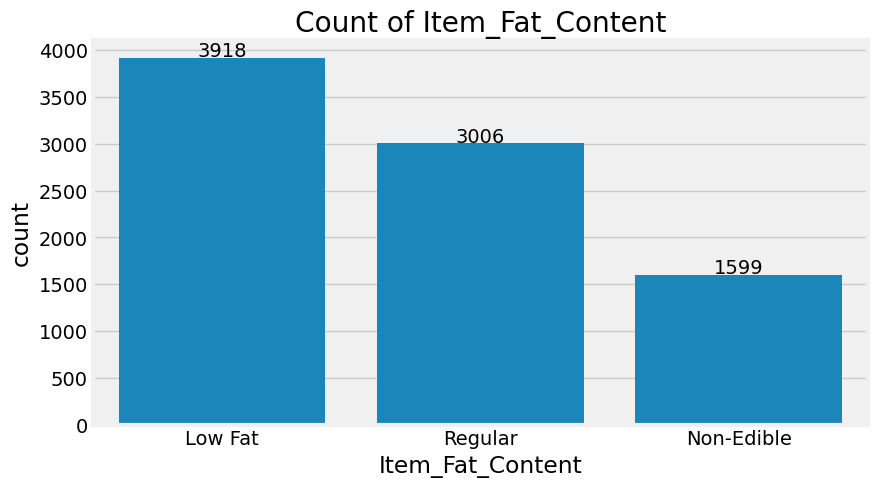

In [42]:
plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
plot = sns.countplot( data=df,x = 'Item_Fat_Content')
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Item_Fat_Content')
plt.show()

_**Plotting the Bar Graph with count of `Item_Type`  and confirm that there are no null values and identify all unique values from the `Item_Type` and saving the PNG File**_

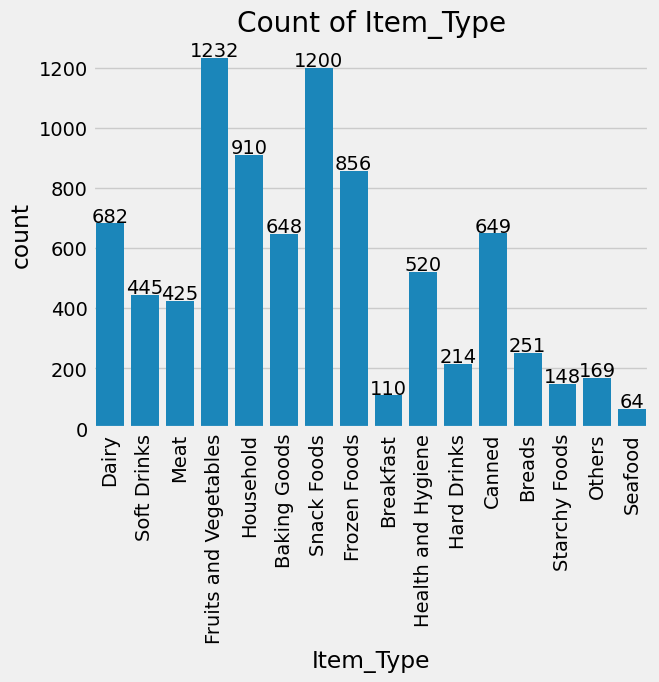

In [43]:
plot = sns.countplot( data=df,x ='Item_Type')
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.xticks(rotation = 90)
plt.title('Count of Item_Type')
plt.show()

_**Plotting the Bar Graph with count of `Outlet_Establishment_Year`  and confirm that there are no null values and identify all unique values from the `Outlet_Establishment_Year` and saving the PNG File**_

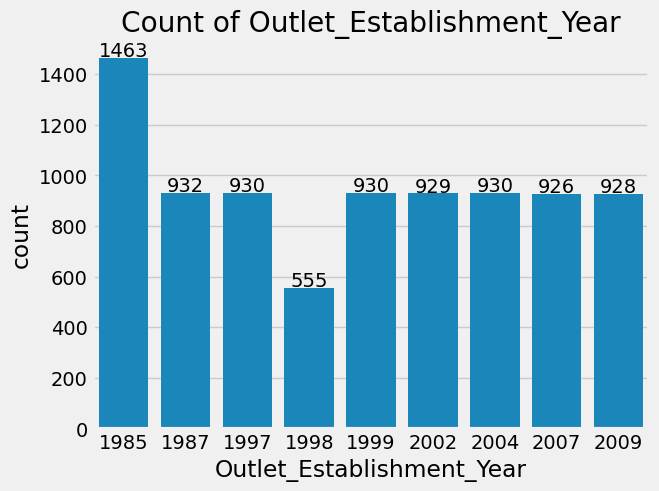

In [44]:
plot = sns.countplot(data=df,x ='Outlet_Establishment_Year')
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Outlet_Establishment_Year')
plt.show()

_**Plotting the Bar Graph with count of `Outlet_Location_Type`  and confirm that there are no null values and identify all unique values from the `Outlet_Location_Type` and saving the PNG File**_

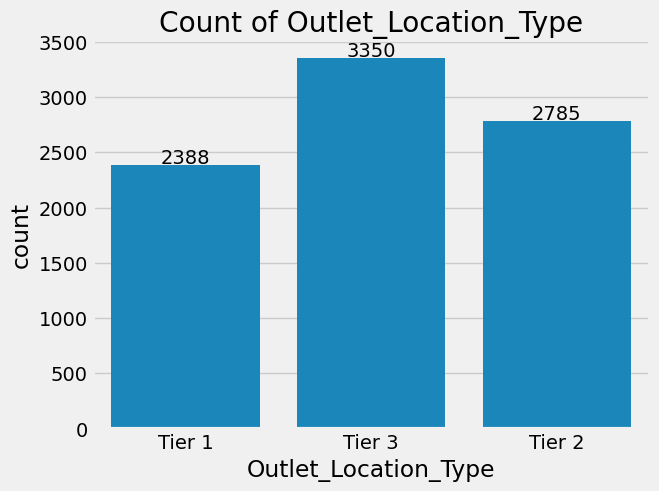

In [45]:
plot = sns.countplot(data=df, x = 'Outlet_Location_Type')
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Outlet_Location_Type')
plt.show()

_**Plotting the Bar Graph with count of `Outlet_Size`  and confirm that there are no null values and identify all unique values from the `Outlet_Size` and saving the PNG File**_

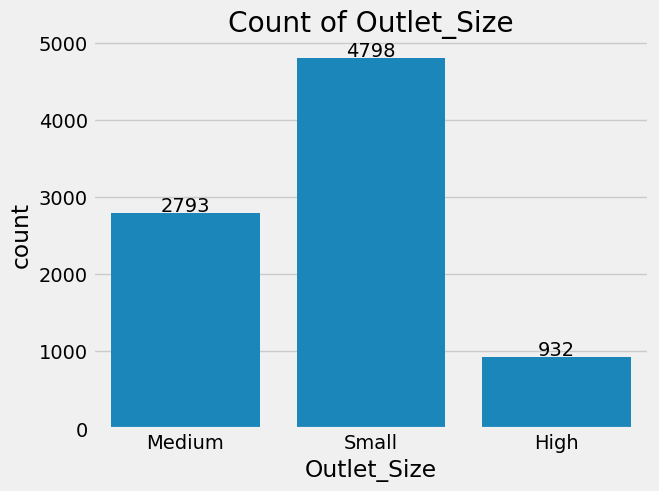

In [46]:

plot = sns.countplot(data=df, x = 'Outlet_Size')
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Outlet_Size')
plt.show()

_**Plotting the Bar Graph with count of `Outlet_Type`  and confirm that there are no null values and identify all unique values from the `Outlet_Type` and saving the PNG File**_

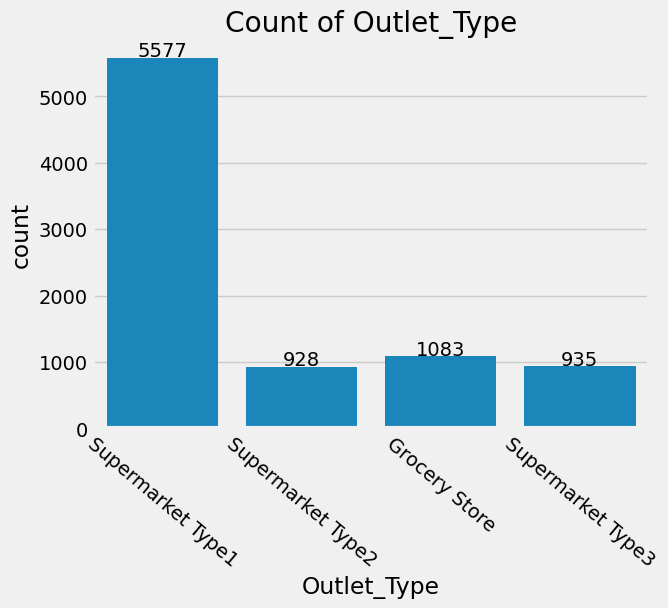

In [47]:
plot = sns.countplot(data=df,x = 'Outlet_Type')
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Outlet_Type')
plt.xticks(rotation=320)
plt.show()

_**Visualizing the data distribution of the `Item_weight` column against the density distribution using Seaborn Distplot and saving the PNG file**_

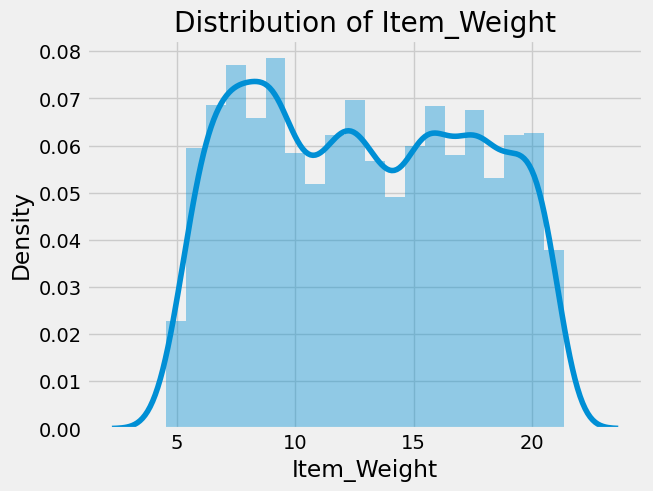

In [48]:
sns.distplot(df['Item_Weight'],bins = 20)
plt.title('Distribution of Item_Weight')
plt.show()

_**Getting the Correlation Values from all the numeric columns from the dataset using Seaborn Heatmap & saving the PNG File**_

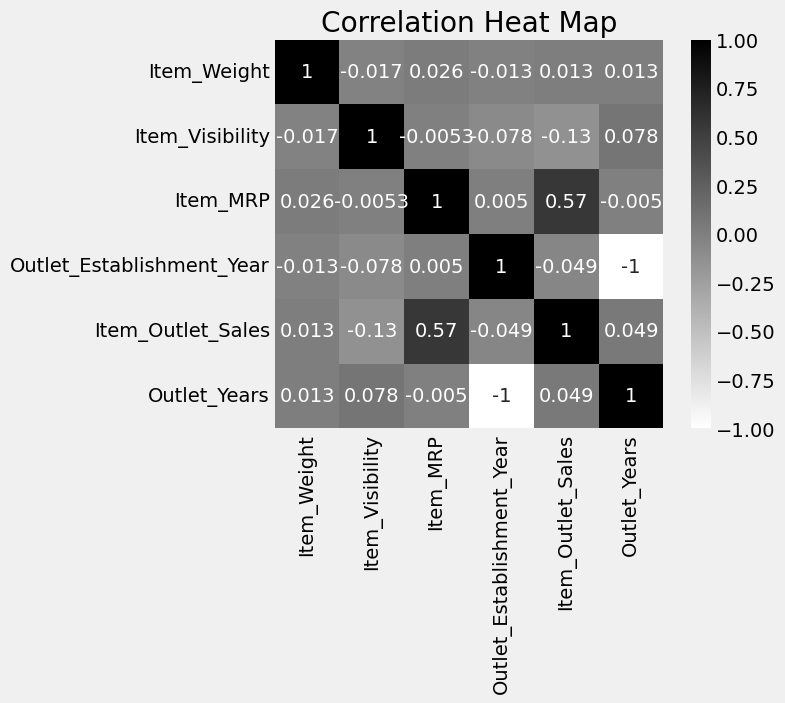

In [49]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(),cmap = 'binary', cbar = True, annot = True, square = True)
plt.title('Correlation Heat Map')
plt.show()

## Data Preprocessing

In [50]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


###This script encodes categorical columns in the dataset using LabelEncoders and saves the encoders along with the one-hot encoded column names into a single file (encoders.pkl).
_**The saved encoders will be used later for consistent preprocessing during model inference or deployment.**_


In [51]:
import joblib


def save_encoders(df):
    # Initialize and fit LabelEncoder for 'Outlet_Identifier'
    outlet_le = LabelEncoder()
    df['Outlet'] = outlet_le.fit_transform(df['Outlet_Identifier'])

    # List of categorical columns to encode using LabelEncoder
    cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']

    # Store the names of one-hot encoded columns (before label encoding)
    one_hot_cols = pd.get_dummies(df[cat_cols]).columns.tolist()

    # Dictionary to store LabelEncoders for each categorical column
    label_encoders = {}
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Save the outlet encoder, label encoders, and one-hot column names into a single file
    joblib.dump({
        'outlet_encoder': outlet_le,
        'label_encoders': label_encoders,
        'one_hot_columns': one_hot_cols
    }, 'encoders.pkl')

    # Print confirmation message
    print(f"Encoders and one-hot columns saved successfully.\nOne-hot columns: {one_hot_cols}")

# Call the function to save encoders
save_encoders(df)


Encoders and one-hot columns saved successfully.
One-hot columns: ['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3', 'New_Item_Type_Drinks', 'New_Item_Type_Food', 'New_Item_Type_Non-Consumables']


_**Assigning the dependent and independent variable**_

In [52]:
x = df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [53]:
x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'New_Item_Type', 'Outlet_Years', 'Outlet'],
      dtype='object')

In [54]:
df.to_csv('Preprocessed_Data.csv',index=False)

## Model Fitting

_**Splitting the dependent variable & independent variable into training and test dataset using  <span style = 'background : green'><span style = 'color : white'> train test split </span> </span>**_

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

_**Passing some of the list of parameters for the <span style ='color:green'> CatBoost Regressor </span> Model to run with Randomized Search CV Algorithm**_

## Hyperparameter Tuning & Model Training


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [57]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [58]:
# Decision Tree
param_dt = {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
gs_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_dt, cv=3, n_jobs=-1)
gs_dt.fit(X_train, y_train)
y_pred_dt = gs_dt.predict(X_test)

In [59]:
# Random Forest
param_rf = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1,2,4]}
gs_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_rf, cv=3, n_jobs=-1)
gs_rf.fit(X_train, y_train)
y_pred_rf = gs_rf.predict(X_test)


In [60]:
# XGBoost
param_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 6, 10], 'learning_rate': [0.01, 0.1, 0.3], 'subsample': [0.8, 1], 'colsample_bytree': [0.8, 1]}
rs_xgb = RandomizedSearchCV(XGBRegressor(random_state=42, verbosity=0, early_stopping_rounds=10,enable_categorical=True), param_xgb, n_iter=10, cv=3, n_jobs=-1)
rs_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
y_pred_xgb = rs_xgb.predict(X_test)


In [61]:
# CatBoost
param_cat = {
    'iterations': [300, 500, 700],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7]
}
rs_cat = RandomizedSearchCV(CatBoostRegressor(random_state=42, verbose=0, early_stopping_rounds=20), param_cat, n_iter=20, cv=5, n_jobs=-1)
rs_cat.fit(X_train, y_train, eval_set=(X_test, y_test))
y_pred_cat = rs_cat.predict(X_test)
print("Best Params:", rs_cat.best_params_)
print("Best Score (CV R2):", rs_cat.best_score_)


Best Params: {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 4}
Best Score (CV R2): 0.5991071577410686


### Evaluation Metrics


In [62]:

results = {
    'Linear Regression': {
        'R2': r2_score(y_test, y_pred_lr),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        'MAE': mean_absolute_error(y_test, y_pred_lr)
    },
    'Decision Tree': {
        'R2': r2_score(y_test, y_pred_dt),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        'MAE': mean_absolute_error(y_test, y_pred_dt)
    },
    'Random Forest': {
        'R2': r2_score(y_test, y_pred_rf),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        'MAE': mean_absolute_error(y_test, y_pred_rf)
    },
    'XGBoost': {
        'R2': r2_score(y_test, y_pred_xgb),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        'MAE': mean_absolute_error(y_test, y_pred_xgb)
    },
    'CatBoost': {
        'R2': r2_score(y_test, y_pred_cat),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_cat)),
        'MAE': mean_absolute_error(y_test, y_pred_cat)
    }
}

results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
                         R2         RMSE         MAE
Linear Regression  0.501465  1205.375597  908.755917
Decision Tree      0.580037  1106.318611  775.320283
Random Forest      0.582354  1103.261464  773.986130
XGBoost            0.594922  1086.534978  764.393409
CatBoost           0.598319  1081.970097  763.183811
